[Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects)

GOAL: create a logistic regression machine learning model to predict whether a kickstarter project will succeed or fail.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning

In [3]:
fs = pd.read_csv('ks-projects-201612.csv',engine='python')
fs.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)
fs.columns = fs.columns.str.strip() #removes white space at both ends
fs.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [4]:
fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 13 columns):
ID               323750 non-null int64
name             323746 non-null object
category         323745 non-null object
main_category    323750 non-null object
currency         323750 non-null object
deadline         323750 non-null object
goal             323750 non-null object
launched         323750 non-null object
pledged          323750 non-null object
state            323750 non-null object
backers          323750 non-null object
country          323750 non-null object
usd pledged      319960 non-null object
dtypes: int64(1), object(12)
memory usage: 32.1+ MB


In [5]:
fs.isnull().sum()

ID                  0
name                4
category            5
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged      3790
dtype: int64

In [6]:
fs.dropna(subset=['name','category'],how='any',inplace=True)
fs.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged      3790
dtype: int64

In [7]:
fs['goal'] = pd.to_numeric(fs['goal'],errors='coerce')
fs['pledged'] = pd.to_numeric(fs['pledged'],errors='coerce')
fs['backers'] = pd.to_numeric(fs['backers'],errors='coerce')
fs['usd pledged'] = pd.to_numeric(fs['usd pledged'],errors='coerce')
fs.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal              627
launched            0
pledged           619
state               0
backers           618
country             0
usd pledged      4408
dtype: int64

In [8]:
fs.describe()

,ID,goal,pledged,backers,usd pledged
count,3.237410e+05,3.231140e+05,3.231220e+05,323123.000000,3.193330e+05
mean,1.074945e+09,4.715236e+04,8.697013e+03,101.912566,7.847557e+03
std,6.193376e+08,1.139584e+06,8.958594e+04,947.790901,8.468339e+04
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00
25%,5.375727e+08,2.000000e+03,3.000000e+01,2.000000,2.500000e+01
50%,1.075821e+09,5.000000e+03,6.100000e+02,12.000000,5.350000e+02
75%,1.611082e+09,1.500000e+04,3.938930e+03,55.000000,3.574872e+03
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07


In [9]:
# Mean imputation to fill remaining missing values for numerical columns
fs['goal'] = fs['goal'].fillna(value=fs['goal'].mean())
fs['pledged'] = fs['pledged'].fillna(value=fs['pledged'].mean())
fs['backers'] = fs['backers'].fillna(value=fs['backers'].mean())
fs['usd pledged'] = fs['usd pledged'].fillna(value=fs['usd pledged'].mean())
fs.isnull().sum()

ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
usd pledged      0
dtype: int64

In [10]:
# Turning 'backers' to int because that column being float makes no sense
fs['backers'] = fs['backers'].astype(int)

In [11]:
# Want to convert dates to datetime to use months and years later
fs['deadline'] = pd.to_datetime(fs['deadline'],errors='coerce',format='%Y-%m-%d %H:%M:%S')
fs['launched'] = pd.to_datetime(fs['launched'],errors='coerce',format='%Y-%m-%d %H:%M:%S')
fs.isnull().sum()

ID                 0
name               0
category           0
main_category      0
currency           0
deadline         627
goal               0
launched         580
pledged            0
state              0
backers            0
country            0
usd pledged        0
dtype: int64

In [12]:
fs.dropna(subset=['deadline','launched'],how='any',inplace=True)
fs.isnull().sum()

ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
usd pledged      0
dtype: int64

In [13]:
# Finally cleaned up and updated everything!
fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323114 entries, 0 to 323749
Data columns (total 13 columns):
ID               323114 non-null int64
name             323114 non-null object
category         323114 non-null object
main_category    323114 non-null object
currency         323114 non-null object
deadline         323114 non-null datetime64[ns]
goal             323114 non-null float64
launched         323114 non-null datetime64[ns]
pledged          323114 non-null float64
state            323114 non-null object
backers          323114 non-null int64
country          323114 non-null object
usd pledged      323114 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 34.5+ MB


In [14]:
# Exporting as CSV to use in other tools like Tableau, Excel, etc.
fs.to_csv('kickstarter_clean.csv')

# Data Setup 1

In [15]:
fs.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0


In [16]:
fs['state'].value_counts()

failed        168218
successful    113081
canceled       32354
live            4428
undefined       3555
suspended       1478
Name: state, dtype: int64

In [17]:
# ONLY IF YOU WANT TO SPECIFY FAIL OR SUCCESS
#fs = ks[(ks['state'] == 'failed') | (ks['state'] == 'successful')]
#fs.head()

In [18]:
fs['state'].value_counts()

failed        168218
successful    113081
canceled       32354
live            4428
undefined       3555
suspended       1478
Name: state, dtype: int64

In [19]:
# what year the projected started
fs['year launched'] = fs['launched'].apply(lambda x: x.year)
fs['year launched'].value_counts()

2015    77180
2014    67602
2016    54494
2013    44755
2012    41088
2011    26173
2010    10491
2009     1324
1970        7
Name: year launched, dtype: int64

In [20]:
# what month the project started
fs['month launched'] = fs['launched'].apply(lambda x: x.month)
fs['month launched'].value_counts()

7     32084
10    28746
3     28645
11    28170
6     28053
5     28028
8     27881
4     27824
9     26928
2     25653
1     23214
12    17888
Name: month launched, dtype: int64

In [21]:
# total days in-between
fs['total days'] = ((fs.deadline - fs.launched)/np.timedelta64(1, 'D'))
fs['total days'] = fs['total days'].astype(int)
fs['total days'].value_counts()

30       136012
60        25581
29        16856
45        14394
31         9118
          ...  
14733         1
14761         1
16739         1
14867         1
14835         1
Name: total days, Length: 99, dtype: int64

In [22]:
fs.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,year launched,month launched,total days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,2015,8,58
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,2013,1,45
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,2012,3,30
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,2015,7,55
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,2016,2,35


In [23]:
# Dropping some unecessary columns. Can always change this later!
# Dropped ID because they're all unique values, so not really useful.
# Dropped 'category' because using 'main_category' instead. Could change!
# Dropped 'usd pledged' because 'pledged' column is similar enough
# Dropped 'deadline' and 'launched' because we got total month and year
fs.drop(['ID','name','category','usd pledged','deadline','launched'],axis=1,inplace=True)
fs.head()

,main_category,currency,goal,pledged,state,backers,country,year launched,month launched,total days
0,Publishing,GBP,1000.0,0.0,failed,0,GB,2015,8,58
1,Film & Video,USD,45000.0,220.0,failed,3,US,2013,1,45
2,Music,USD,5000.0,1.0,failed,1,US,2012,3,30
3,Film & Video,USD,19500.0,1283.0,canceled,14,US,2015,7,55
4,Food,USD,50000.0,52375.0,successful,224,US,2016,2,35


In [24]:
# Project states: we are only looking for fail and success states, so drop
fs.drop(fs.index[fs['state'] == 'canceled'],inplace=True)
fs.drop(fs.index[fs['state'] == 'live'],inplace=True)
fs.drop(fs.index[fs['state'] == 'undefined'],inplace=True)
fs.drop(fs.index[fs['state'] == 'suspended'],inplace=True)

In [25]:
# Turning target variable (state) to binary format
#fs['state'].replace(to_replace=['failed','successful','canceled','live','undefined','suspended'],value=[0,1,2,3,4,5],inplace=True)
fs['state'] = fs['state'].map({'failed':0,'successful':1})
fs['state'].value_counts()

0    168218
1    113081
Name: state, dtype: int64

# Data Visual Exploration

In [26]:
# NOTE: 0=failed,1=succeeded
fs.head()

,main_category,currency,goal,pledged,state,backers,country,year launched,month launched,total days
0,Publishing,GBP,1000.0,0.0,0,0,GB,2015,8,58
1,Film & Video,USD,45000.0,220.0,0,3,US,2013,1,45
2,Music,USD,5000.0,1.0,0,1,US,2012,3,30
4,Food,USD,50000.0,52375.0,1,224,US,2016,2,35
5,Food,USD,1000.0,1205.0,1,16,US,2014,12,20


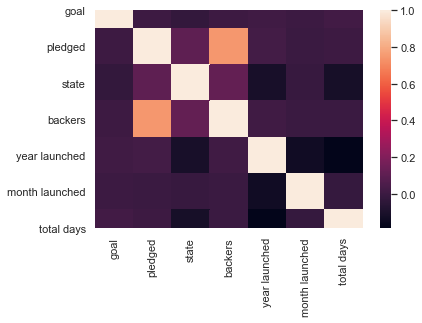

In [27]:
# Based on this heatmap, there is a high correlation with backers
# and pledged amounts. Otherwise, not much correlation with
# independent variables
sns.heatmap(fs.corr())

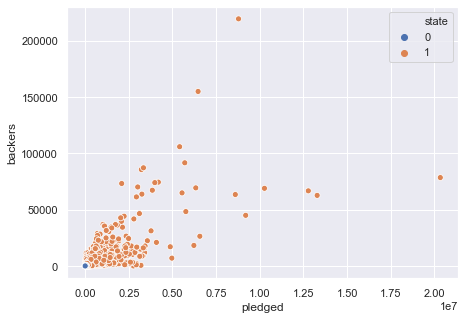

In [28]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=fs,x='pledged',y='backers',hue='state')

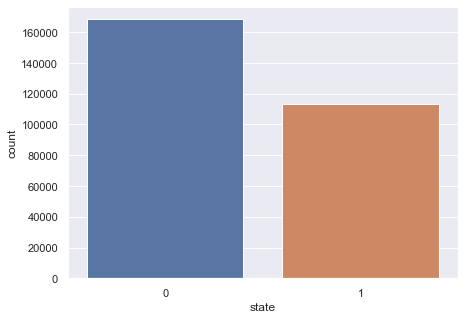

In [29]:
# There looks to be more project failures than successes in this dataset
# Heavy bias towards failure and success rates
plt.figure(figsize=(7,5))
sns.countplot(fs['state'])

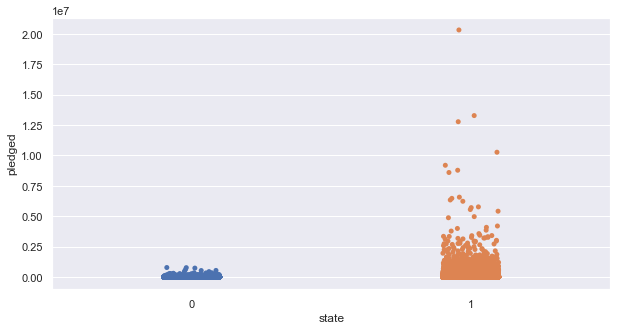

In [30]:
# Makes sense. Successful projects have more and higher pledge amounts
plt.figure(figsize=(10,5))
sns.stripplot(data=fs,x='state',y='pledged',jitter=True)

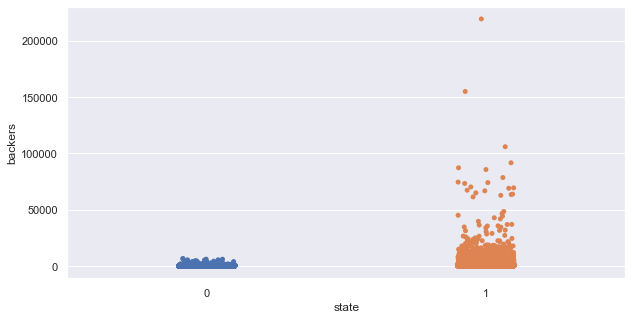

In [31]:
# Sucessful projects have more backers, which also makes sense
plt.figure(figsize=(10,5))
sns.stripplot(data=fs,x='state',y='backers',jitter=True)

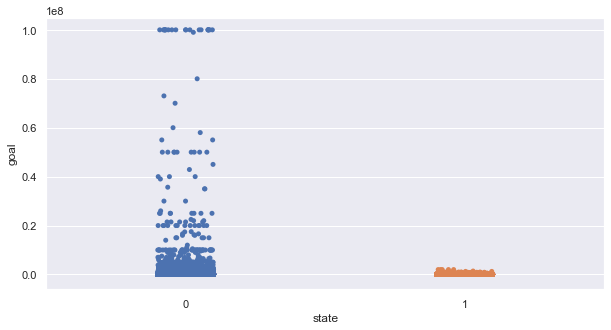

In [32]:
# Failed and cancelled projects tend to have higher funding goals
# Most likely because high funding goals are difficult to reach
plt.figure(figsize=(10,5))
sns.stripplot(data=fs,x='state',y='goal',jitter=True)

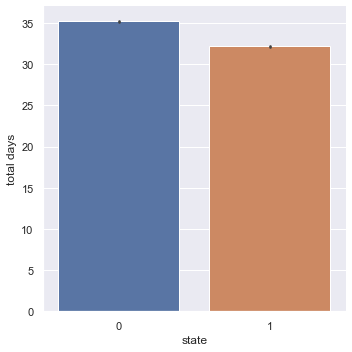

In [33]:
# Successful projects, on average, have the lowest duration of days online
sns.catplot(data=fs,x='state',y='total days',kind='bar')

# Data Setup 2

In [34]:
# Time to create some dummy independent variables
main_cat = pd.get_dummies(fs['main_category'],drop_first=True)
curr = pd.get_dummies(fs['currency'],drop_first=True)
coun = pd.get_dummies(fs['country'],drop_first=True)

In [35]:
fs = pd.concat([fs,main_cat,curr,coun],axis=1)
fs.head()

,main_category,currency,goal,pledged,state,backers,country,year launched,month launched,total days,...,IT,LU,MX,"N,""0",NL,NO,NZ,SE,SG,US
0,Publishing,GBP,1000.0,0.0,0,0,GB,2015,8,58,...,0,0,0,0,0,0,0,0,0,0
1,Film & Video,USD,45000.0,220.0,0,3,US,2013,1,45,...,0,0,0,0,0,0,0,0,0,1
2,Music,USD,5000.0,1.0,0,1,US,2012,3,30,...,0,0,0,0,0,0,0,0,0,1
4,Food,USD,50000.0,52375.0,1,224,US,2016,2,35,...,0,0,0,0,0,0,0,0,0,1
5,Food,USD,1000.0,1205.0,1,16,US,2014,12,20,...,0,0,0,0,0,0,0,0,0,1


In [36]:
# Time to remove main_category, currency, and country since we got
# the dummy variables for those columns now.
fs.drop(['main_category','currency','country'],axis=1,inplace=True)
fs.head()

,goal,pledged,state,backers,year launched,month launched,total days,Comics,Crafts,Dance,...,IT,LU,MX,"N,""0",NL,NO,NZ,SE,SG,US
0,1000.0,0.0,0,0,2015,8,58,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45000.0,220.0,0,3,2013,1,45,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5000.0,1.0,0,1,2012,3,30,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,50000.0,52375.0,1,224,2016,2,35,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1000.0,1205.0,1,16,2014,12,20,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Create Models

In [37]:
X = fs.drop('state',axis=1)
y = fs['state']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [40]:
# Feature Scaling to normalize/standardize features (columns)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logmod = LogisticRegression()

K-Nearest Neighbors

In [42]:
# KNNs don't scale well with large datasets, so not using it.
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=1)

Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

Support Vector Machines

In [44]:
# SVMs don't scale well with large datasets, so not using it.
from sklearn.svm import SVC
svm = SVC(kernel='linear')

# Cross Validation and Choose Model

Checking which classification models will perform best with this dataset through cross validation.

In [45]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(logmod,X=X_train,y=y_train,cv=5,scoring='accuracy',verbose=2).mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=  15.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.4s remaining:    0.0s


[CV] ................................................. , total=  43.6s
[CV]  ................................................................
[CV] ................................................. , total=  19.3s
[CV]  ................................................................
[CV] ................................................. , total=  27.5s
[CV]  ................................................................
[CV] ................................................. , total=  19.1s
0.8579267934669182


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


In [46]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc,X=X_train,y=y_train,cv=5,scoring='accuracy',verbose=2).mean())

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   2.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] ................................................. , total=   2.1s
[CV]  ................................................................
[CV] ................................................. , total=   2.1s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
[CV]  ................................................................
[CV] ................................................. , total=   2.2s
0.9904283234655183


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.2s finished


The random forest performed the best in terms of accuracy by a significant amount. In addition, it looks to be less computationally expensive. For those reasons, I'm going to utilize random forest.

# Tweaking Parameters

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'n_estimators':[25,50,100]}
grid = GridSearchCV(rfc,param_grid,cv=5,verbose=2)

# Fitting Model

In [49]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=25 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=25, total=   5.1s
[CV] n_estimators=25 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV] .................................. n_estimators=25, total=   5.3s
[CV] n_estimators=25 .................................................
[CV] .................................. n_estimators=25, total=   5.0s
[CV] n_estimators=25 .................................................
[CV] .................................. n_estimators=25, total=   5.0s
[CV] n_estimators=25 .................................................
[CV] .................................. n_estimators=25, total=   5.2s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  11.1s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  10.2s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=  11.5s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [50]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
pred_rfc = grid.predict(X_test)

In [52]:
y_test

152913    0
23924     0
30499     0
173039    1
240615    1
         ..
223894    1
182588    0
58092     1
95065     1
160420    0
Name: state, Length: 56260, dtype: int64

# Evaluations

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [54]:
# NOTE: 0=failed,1=succeeded
print(confusion_matrix(y_test,pred_rfc))
print('\n')
print(classification_report(y_test,pred_rfc))
print('\n')
print(f'accuracy score = {accuracy_score(y_test,pred_rfc)}')

[[33377   322]
 [   90 22471]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     33699
           1       0.99      1.00      0.99     22561

    accuracy                           0.99     56260
   macro avg       0.99      0.99      0.99     56260
weighted avg       0.99      0.99      0.99     56260



accuracy score = 0.9926768574475648


This model did very well in its precision and recall rate, giving it an f1-score of 99%. In addition, there were some noisy points that this model was unable to grab. This is a good thing because it shows that our model is not overfit and has predictive capabilities.

(2.0, 0.0)

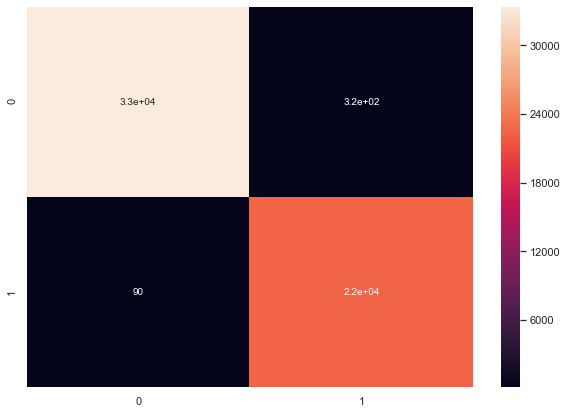

In [55]:
# Visualizing confusion matrix as heatmap
plt.figure(figsize=(10,7))
conmat = sns.heatmap(confusion_matrix(y_test,pred_rfc),annot=True)
bottom, top = conmat.get_ylim()
conmat.set_ylim(bottom + 0.5, top - 0.5)

In [56]:
# Getting feature weights
importance = grid.best_estimator_.feature_importances_
impdf = pd.DataFrame(np.around(importance,4)*100,X.columns,['Importance'])
# Summing up dummy variables into respective categories
impdf.loc['Main Category'] = sum(importance[6:20])*100
impdf.loc['Currency'] = sum(importance[20:32])*100
impdf.loc['Country'] = sum(importance[20:])*100
# Importance of feature weights in %
pd.concat([impdf[0:6],impdf[-3:]])

,Importance
goal,21.850000
pledged,35.980000
backers,33.900000
year launched,1.310000
month launched,1.200000
total days,2.390000
Main Category,2.643079
Currency,0.289412
Country,0.730672
